<a href="https://colab.research.google.com/github/Rafael-Salomao/Segmentacao_de_Clientes/blob/main/Segmentacao_de_Clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segmentação de Clientes em um Shopping

## 1. Entender o Problema

### Contextualização do problema

Neste projeto, vamos fazer um trabalho de segmentação de clientes. O intuito é poder fazer campanhas mais direcionadas a um determinado público que tem uma maior propensão ao consumo de um produto, tipo de oferta etc.. Com isso, reduzimos o custo por aquisição de clientes (CPA) devido ao aumento da probabilidade de compra.

Para iniciar, irei apresentar a sigla STP. Esta que se trata de um framework que acompanha a estratégia de markating em empresas de diversos segmentos. O conceito se baseia na Segmentação, Target e Posicionamento.

A aplicação do modelo STP tem como seus principais objetivos:

- Segmentação de mercado, que se refere a separação dos clientes em grupos que compartilham características comportamentais semelhantes;

- Identificação dos clientes ideais para a marca, o qual é feito ao mensurar o lucro potencial de cada grupo e decidir em qual deles focar - um dos critérios a serem analisados é o seu tamanho atual, potencial de crescimento e as ofertas dos concorrentes;

- Posicionamento da oferta, em que direcionar a forma que cada produto será apresentado para cada segmento.

Portanto, o seguinte projeto tem como objetivo segmentar os clientes, de modo que seja possível aplicar o modelo STP. Essas informações serão úteis para auxiliar as estratégias de marketing e desenvolvimento de produtos, e, consequentemente, aumentar o faturamento da loja.

### Escopo do problema

Uma loja de um shopping quer entender melhor o perfil de seus clientes. O estabelecimento conta com algumas informações da sua carteira de clientes.

No atual cenário, o dono do comercial não sabe dizer claramente quem são seus melhores clientes e qual tipo de produto oferecer a fim de resultar em aumento de vendas. Para isso, o ideal seria entender o perfil de seus clientes, para melhor atendê-los.

Por conta disso, o gerente responsável contratou um cientista de dados para responder as seguintes questões:

- Em quantos segmentos é possível separar os clientes?

- Separar os clientes em diferentes segmentos.

- Qual a idade média dos clientes dentro de cada cluster?

- Qual o salário médio dos clientes dentro de cada cluster?

- Quais insight podemos ter a cerca do perfil dos clientes dentro de cada cluster?

- Quem é o segmento de clientes alvo para aumentar o faturamento da loja?

### Base de dados

A base de dados utilizada no trabalho em questão se trata da base de "Mall Customer Segmentation Data", disponibilizado no [Kaggle](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python).

O dataset contem com informações de uma carteira de clientes de uma loja. A base conta com 200 entradas, onde cada uma corresponde a um registro de freguês diferente, e 7 variáveis, que serão úteis na segmentação dos consumidores.

As variáveis presentes no dataset são:

- `CustomerID`: identificação de cada cliente;

- `Gender`: Male ou Female;

- `Age`: idade do cliente;

- `Annual Income (k$)`: renda anual do cliente, em mil.

- `Spending Score(1-100)`: Score, atribuída pelo shopping, com base no comportamento do cliente e na natureza de seus gastos.

### Solução problema

Para a resolução do problema enfrentado pela loja, será aplicado um modelo estatístico muito utilizado na segmentação de clientes, o `K-Means`.

O problema se trata de um aprendizado não-supervisionado, ou seja, ao invés de realizar a previsão dos resultados a partir de outros resultados, os outputs serão encontrados, baseados nos inputs que ainda não estão classificados na base de dados. É neste ponto que a segmentação é feita, o modelo encontra semelhanças entre os diferentes clientes e os separam em clusters, sendo o `K-Means`, um modelo simples e eficiênte para esta prática.

Separar em clusters, é a tarefa de agrupar um conjunto de objetos de forma que os individuos presentes no mesmo cluster sejam mais semelhantes entre si do que em os presentes em outros clusters. Além da segmentação de clientes, os clusters são bastante usados na exploração de dados, assim como em outros campos mais sofisticados da ciência de dados, como reconhecimento de padrões, análise de imagens, recuperação de informações, bioinformática, compressão de dados e computação gráfica.

Para este projeto, ao utilizar o modelo de segmentação `K-Means`, é esperado que ao final dele seja obtido o segmento em que cada um dos clientes se encaixa. Em complemento a isso, o número de clusters que melhor satisfaz a necessidade do nedógioc será definido por meio da analise do score do modelo. Sendo que, esta analise será feita a partir da visualização do `Elbow Graph` e `Silhouette Analysis`.

### Estrutura do projeto.

A estrutura do projeto foi elaborada com base no framework CRISP-DM. Por conta disso, a resolução do problema, introduzido anteriormente, será apresentada por meio dos seguintes tópicos:

- Exploração dos dados

- Preparação dos dados

- Construção do modelo

- Avaliação dos resultados

- Deploy e conclusão

## 2. Explorar os Dados

### Importar bibliotecas e base de dados

In [1]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.cluster.hierarchy import dendrogram, linkage

import pickle

import warnings
import os
warnings.filterwarnings("ignore")

In [2]:
# Importar dataset de clientes
datapath = 'https://raw.githubusercontent.com/Rafael-Salomao/Segmentacao_de_Clientes/main/Mall_Customers.csv'

df = pd.read_csv(datapath)
df.shape

(200, 5)

### Visualizar dados

Após importar a base de dados, iremos realizar algumas visualizações para tem uma consciência situacional dos dados que serão trabalhados.

A partir da visibilidade das primeira e últimas linhas, features, tipos de variáveis, valores ausentes/ nulos e valores únicos em cada variável; é possível inferer os seguintes pontos:

- Os tipos das variáveis estão condizentes com seus valores no dataset. No entanto, é preciso ajustar a variável de gênero, para torná-la numérica e se adequar ao modelo K-Means. Portanto será realizado um enconding nesta variável.

- Não temos valores nulos ou ausentes.

- A variável `CustomerID` não apresenta valores repitidos, com isso, podemos considerar esta coluna como índice de dataset.

- Para facilitar o segmento do projeto, foram alterados os nomes das colunas:
  - `Annual Income (k$)` para `Income`;
  - `Spending Score (1-100)` para `Score`.

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
# Verificar tipos de variáveis.
print( '-> Tipos de variáveis:\n{}\n'.format( df.dtypes ) )

# Verificar valores nulos ou ausentes.
print( '-> Valores nulos ou ausentes em cada variável:\n{}\n'.format( df.isnull( ).sum( ) ) )
print( df.info( ) )

# Verificar os nomes das variáveis.
print( '\n-> Nome das variáveis:\n{}'.format( df.columns ) )

# Verificar valores únicos em cada variável.
print( '\n-> Valores únicos em cada variável:\n{}'.format( df.nunique( ) ) )

-> Tipos de variáveis:
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

-> Valores nulos ou ausentes em cada variável:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

-> Nome das variáveis:
Index(['CustomerID', 'Gender', 'Age', 'Annual Inc

In [ ]:
# Alterar nome das colunas 'Annual Income (k$)' e 'Spending Score (1-100)'  
df.rename( columns = { 'Annual Income (k$)': 'Income_k$',
                      'Spending Score (1-100)': 'Score'}, inplace = True)

### Descrição estatística e Presença de Outliers

A partir dos valores estatísticos e graficos boxplot expostos, pode-se  entender que o dataset não conta com valores distorcidos. 

Além disso, a descrição estatística nos mostra informações interessantes sobre as variáveis numéricas, como:

- A média de `Age` dos clientes é cerca de 39 anos, sendo que o cliente mais novo registrado tem 18 anos e o mais velho 70 anos.

- A média do `Income` dos clientes é cerca de 60k, sendo que o cliente que recebe menor valor, tem salário de 15k e quem recebe mais, tem salário de 137k$.

- Já o `Score` médio dos cliente representa um valor de 50.

In [ ]:
df[['Age','Income_k$', 'Score']].describe()

,Age,Income_k$,Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


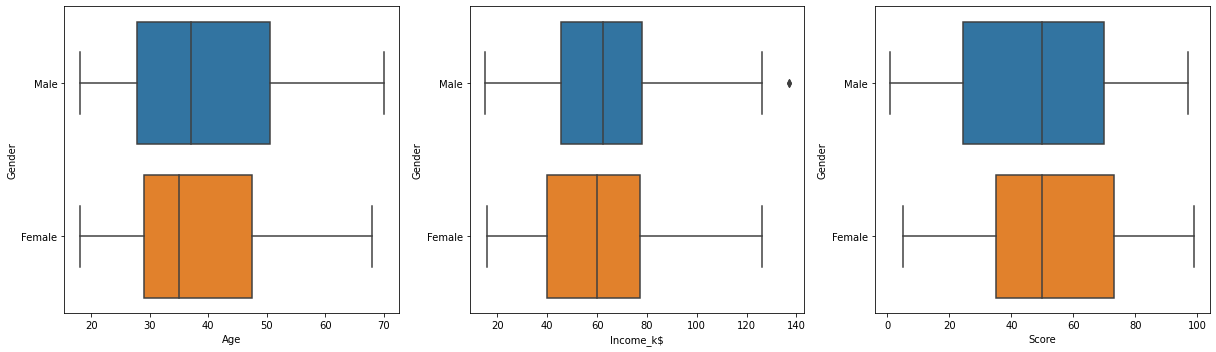

In [ ]:
fig, ax = plt.subplots(ncols = 3, nrows = 1, figsize = (17,5))

sns.boxplot( data=df, x = 'Age', y = 'Gender', ax = ax[0] )
sns.boxplot( data=df, x = 'Income_k$', y = 'Gender', ax = ax[1] )
sns.boxplot( data=df, x = 'Score', y = 'Gender', ax = ax[2] )

plt.tight_layout()

### Distribuição das variáveis

#### Pair Plot

Para identificar relação entre das variáveis numéricas, em consideração ao gênero do cliente.
  - É possível verificar um comportamento, que pode haver um padrão de consumo, na relação entre `Income_k$` e `Score`.
  
  - Ao verificar o gráficos `Aged` x `Score`, pode-se observar que os clientes com score acima de 60, são clientes entre 20 e 40 anos.

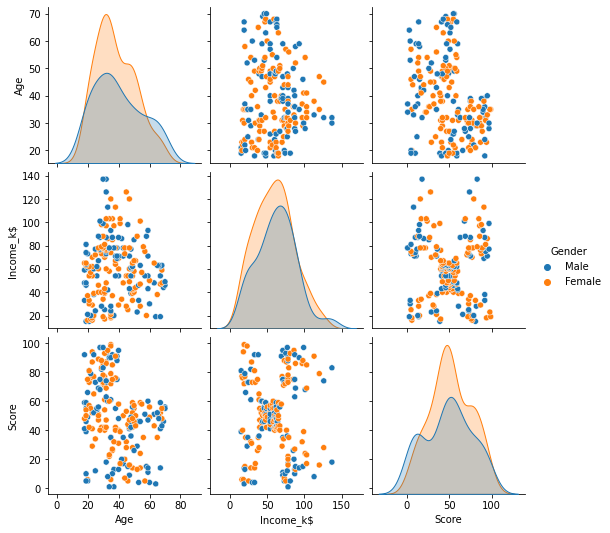

In [ ]:
sns.pairplot(df[['Gender','Age','Income_k$', 'Score']], hue='Gender');

#### Count Plot

Ao analisar a distribuição dos clientes de cada gênero, pode-se verificar que 56% dos clientes analisados são do gênero feminino.

A distribuição de entradas da variável `Gender` é:
Female    112
Male       88
Name: Gender, dtype: int64



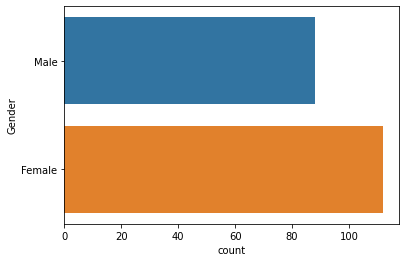

In [ ]:
sns.countplot(y = df['Gender'])
print('A distribuição de entradas da variável `Gender` é:\n{}\n'.format(df['Gender'].value_counts()))

#### Histogramas

- Os histogramas plotados indicam um comportamento de curvas gaussianas, com relação aos valores de entradas das variáveis numéricas.

- O intervalo de valores que corresponde a maior concentração de entradas na variável `Age` é de cerca de 28 a 36 anos.

- O intervalo de valores que corresponde a maior concentração de entradas na variável `Income_k$` é de cerca de 60k a 80k.

- O intervalo de valores que corresponde a maior concentração de entradas na variável `Score` é de cerca de 40 a 60.



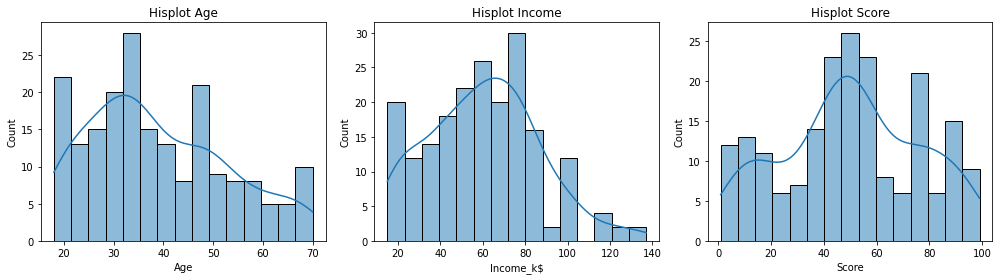

In [ ]:
fig, ax = plt.subplots( ncols=3, nrows=1, figsize=(14,4));

sns.histplot(data=df, x='Age', bins = 15, kde=True, ax=ax[0]);
ax[0].set_title('Hisplot Age')

sns.histplot(data=df, x='Income_k$', bins = 15, kde=True, ax=ax[1]);
ax[1].set_title('Hisplot Income')

sns.histplot(data=df, x='Score', bins = 15, kde=True, ax=ax[2]);
ax[2].set_title('Hisplot Score')

plt.tight_layout()

### Correlação

Ao verificar a correlação entre as varíaveis numéricas, o que chama a atenção é a correlação negativa entre as variáveis `Age` e `Score`.

A partir deste valor, entende-se que quanto mais velhor o cliente, menor tende a ser o seu score. Ou seja, pessoas mais jovens podem ter uma tendência a serem melhores clientes para o comercio analisado.

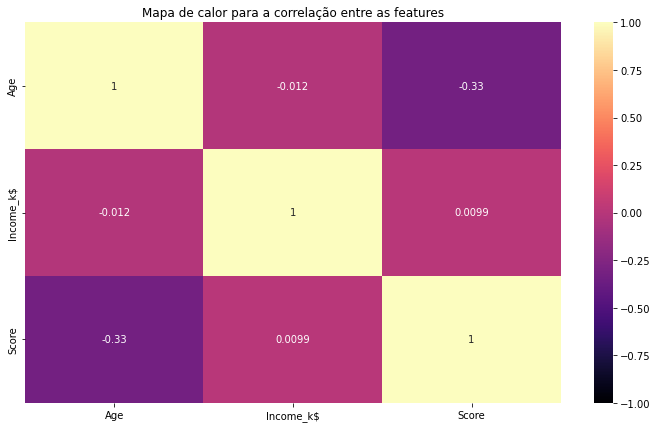

In [ ]:
# Mapa de calor para a correlação
plt.figure(figsize = (12, 7))
sns.heatmap(df[['Gender','Age','Income_k$', 'Score']].corr(), vmin = -1, vmax = 1, cmap = 'magma', annot = True)
plt.title("Mapa de calor para a correlação entre as features")
plt.show()

## 3. Preparar os Dados

Conforme verificado na etapa anterior, não temos muitas alterações a serem feitas no dataset. Como parte desta etapa de preparação dos dados, iremos:

- Ajustar a variável `CustomerID` para o índice do dataframe;

- Fazer o encoding da coluna `Gender`, de modo que:
  - `Female` == 0;
  - `Male` == 1.

In [ ]:
df_prep = df.copy()

# Alterar coluna CustomerID para index
df_prep.set_index('CustomerID', inplace = True)

# Encoding da coluna Gender, sendo que 0 == Female e 1 == Male
df_prep['Gender'] = df_prep['Gender'].replace(['Female', 'Male'], ['0', '1'])
df_prep['Gender'] = df_prep['Gender'].astype(str).astype(int)
df_prep.head()

,Gender,Age,Income_k$,Score
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40


## 4. Construção do Modelo

* Automatizar o maior número de passos possíveis
* Treinar mais de um modelo e comparar as performances
* Analisar as variáveis mais significativas para cada algoritmo
* *Fine-Tune* dos *hyperparameters*
* Uso de *cross-validation*
* Verificar o desempenho dos métodos *Ensemble*, combinando os modelos que tiveram os melhores desempenhos individuais
* Testar o desempenho do mesmo com o *dataset* de teste.

### Cluster hierarquico

O cluster hierárquico é um artifício que pode ser utilizado para determinarmos quantos clusters os dados terão. 

Para este caso, em que a base de dados conta apenas com 200 entradas, pode se considerar que o Cluster Hierárquico satisfaz o que se propoe. Porém, em conjuntos de dados maiores, ele pode demorar muito para ser processado. Contudo, também iremos utilizar a técnica do `K-Means` para avaliar os clusters de nosso problema.

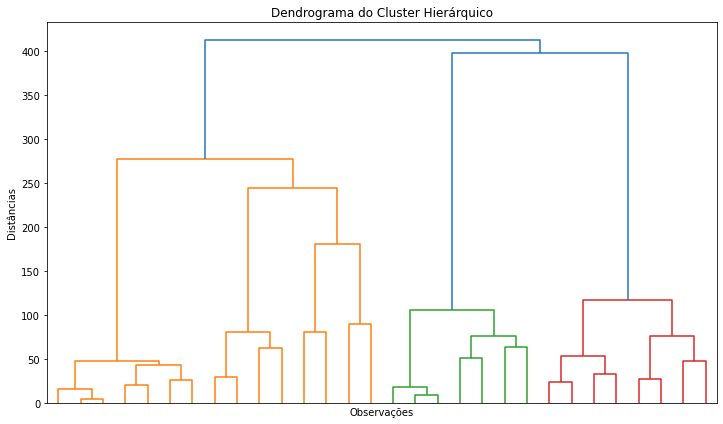

In [ ]:
# Fazendo o clustering
hier_cluster = linkage(df_prep, method = 'ward')

# Plotando o dendrograma
plt.figure(figsize = (12, 7))
dendrogram(hier_cluster,
           show_leaf_counts = False,
           truncate_mode = 'level',
           p = 4,
           no_labels = True)
plt.title("Dendrograma do Cluster Hierárquico")
plt.xlabel("Observações")
plt.ylabel("Distâncias")
plt.show();

### Cluster com o algoritmo K-means

Para tarefas de segmentação, o algoritmo do K-Means funciona muito bem. Entretanto, a utilização desse algoritmo pode ter problemas em alguns casos.

Um exemplo seria a presença de outliers. Por ser um algoritmo que se baseia na minimização da norma euclidiana entre os centróides de cada cluster, isto é, tem forte relação com distâncias, ele é muito sensível a outliers. Para solucionar isso, podemos utilizar o K-Median clustering, porém é computacionalmente mais caro. 

Outro ponto importante é a necessidade de se definir o número K de clusters (por isso o K-Means) antes mesmo de fazer a segmentação. 

Para isso iremos usar o metodo `WCSS (Within Clusters Sum of Squares)` em conjunto ao `Silhouette Graph`. A partir desses dois métodos, iremos entender qual o melhor número de cluster que se adequa melhor a nossa base de clientes.

Para analisar em quais combinações de colunas os clusters apresentam melhor desempenho, os métodos de avaliação serão aplicados nas colunas:

- `Age`, `Score` e `Income_k$`;

- `Score` e `Income_k$`.

#### Análise `Age`, `Score`, `Income`

In [ ]:
X_age_score_income = df_prep[[ 'Age', 'Score', 'Income_k$']]

wcss_age_score_income = []
silhouette_values_age_score_income = []

for i in range( 3, 9 ):
  kmeans = KMeans( n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit( X_age_score_income )

  wcss_age_score_income.append( kmeans.inertia_ )
  silhouette = silhouette_score( X_age_score_income, kmeans.labels_ )
  silhouette_values_age_score_income.append( silhouette )

##### Gráfico do coeficiente de `Coeficiente de Silhouette` x `Número de Clusters` e `Inércia` x `Número de Clusters`

Para n_clusters = 3 A média do silhouette_score é : 0.3839349967742105
Para n_clusters = 4 A média do silhouette_score é : 0.40546302077733304
Para n_clusters = 5 A média do silhouette_score é : 0.44446409171786105
Para n_clusters = 6 A média do silhouette_score é : 0.4523566166018854
Para n_clusters = 7 A média do silhouette_score é : 0.4398198217929885
Para n_clusters = 8 A média do silhouette_score é : 0.42977587111050725


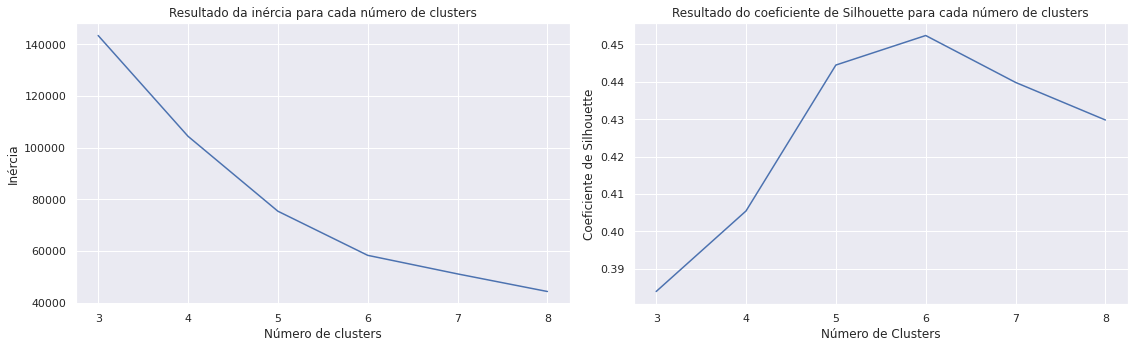

In [ ]:
# Plot elbow graph para 'Age', 'Score', 'Income'
sns.set( )

fig, ax = plt.subplots( ncols = 2, nrows = 1, figsize = ( ( 16, 5 ) ) )

ax[0].plot( range( 3, 9 ), wcss_age_score_income )
ax[0].set_title('Resultado da inércia para cada número de clusters')
ax[0].set_xlabel('Número de clusters')
ax[0].set_ylabel('Inércia')

# Plot Silhouette Graph
ax[1].plot( range( 3, 9 ), silhouette_values_age_score_income )
ax[1].set_title('Resultado do coeficiente de Silhouette para cada número de clusters')
ax[1].set_xlabel('Número de Clusters')
ax[1].set_ylabel('Coeficiente de Silhouette')

plt.tight_layout( )

# Mostrar Silhouette score para cada n_clusters
for i in range( 3, 9 ):
  print(
      "Para n_clusters =",
      i ,
      "A média do silhouette_score é :",
      silhouette_values_age_score_income[i-3],
      ) 

#### Análise `Score`, `Income`

In [ ]:
X_score_income = df_prep[[ 'Score', 'Income_k$']]

wcss_score_income = []
silhouette_values_score_income = []

for i in range( 3, 9 ):
  kmeans = KMeans( n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit( X_score_income )

  wcss_score_income.append( kmeans.inertia_ )
  silhouette = silhouette_score( X_score_income, kmeans.labels_ )
  silhouette_values_score_income.append( silhouette )

##### Gráfico do coeficiente de `Coeficiente de Silhouette` x `Número de Clusters` e `Inércia` x `Número de Clusters`

Para n_clusters = 3 A média do silhouette_score é : 0.46761358158775435
Para n_clusters = 4 A média do silhouette_score é : 0.4931963109249047
Para n_clusters = 5 A média do silhouette_score é : 0.553931997444648
Para n_clusters = 6 A média do silhouette_score é : 0.53976103063432
Para n_clusters = 7 A média do silhouette_score é : 0.5264283703685728
Para n_clusters = 8 A média do silhouette_score é : 0.45827056882053113


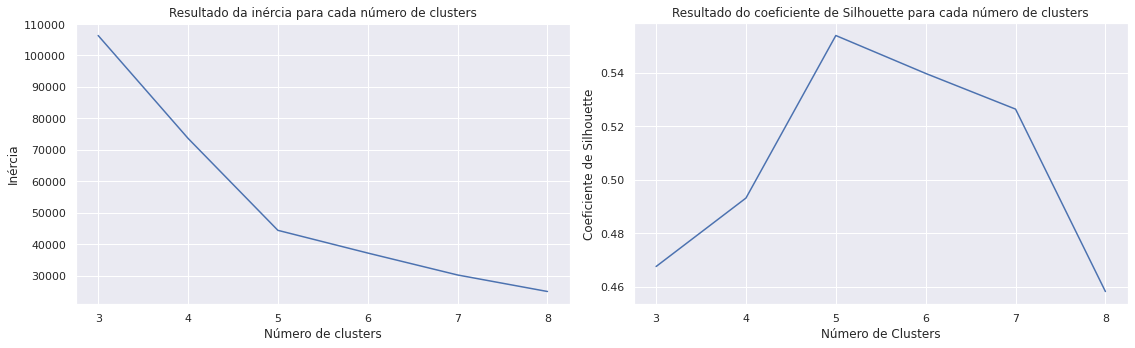

In [ ]:
# Plot elbow graph para 'Age', 'Score', 'Income'
sns.set( )

fig, ax = plt.subplots( ncols = 2, nrows = 1, figsize = ( ( 16, 5 ) ) )

ax[0].plot( range( 3, 9 ), wcss_score_income )
ax[0].set_title('Resultado da inércia para cada número de clusters')
ax[0].set_xlabel('Número de clusters')
ax[0].set_ylabel('Inércia')

# Plot Silhouette Graph
ax[1].plot( range( 3, 9 ), silhouette_values_score_income )
ax[1].set_title('Resultado do coeficiente de Silhouette para cada número de clusters')
ax[1].set_xlabel('Número de Clusters')
ax[1].set_ylabel('Coeficiente de Silhouette')

plt.tight_layout( )

# Mostrar Silhouette score para cada n_clusters
for i in range( 3, 9 ):
  print(
      "Para n_clusters =",
      i ,
      "A média do silhouette_score é :",
      silhouette_values_score_income[i-3],
      )  

A partir da visualização dos gráficos e analise dos scores obtidos, pode-se notar que a análise em que se considerou as `Score` e `Income_k$`, apresentou melhores médias de score. Junto a isso, a quantidade de clusters que melhor atende a segmentação do dataset é `k=5`.

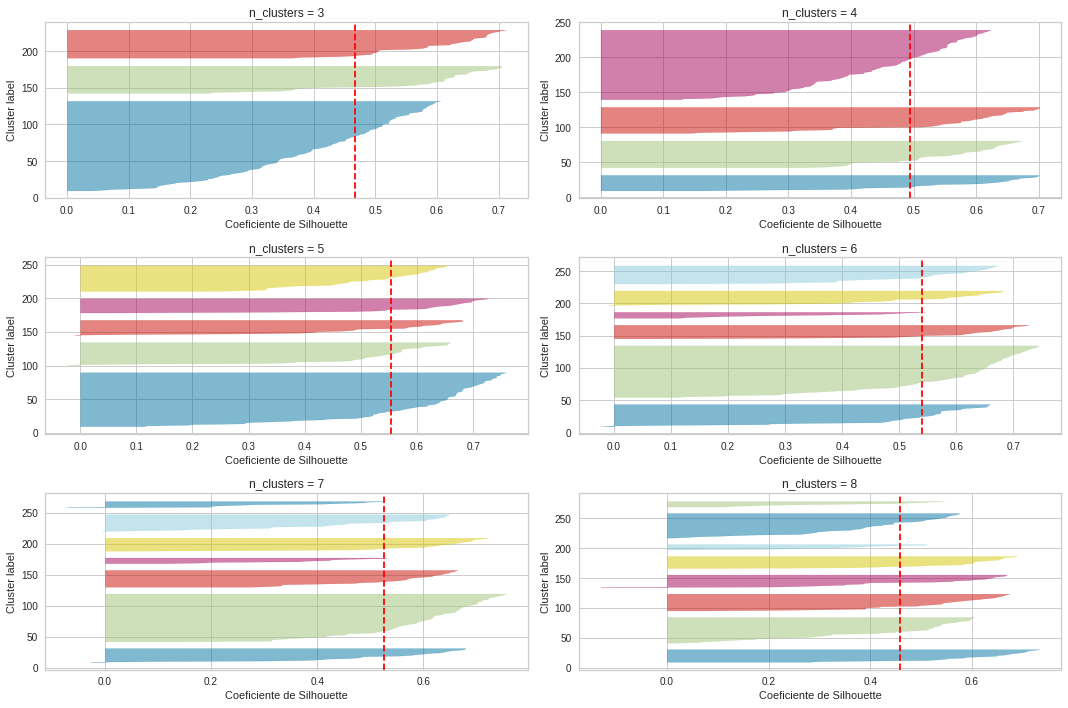

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots( ncols = 2, nrows = 3, figsize=( 15, 10 ) )
for i in range( 3, 9 ):
    '''
    Create KMeans instance for different number of clusters
    '''
    kmeans = KMeans( n_clusters = i, init = 'k-means++', random_state = 42 )
    quotient, remainder = divmod( i-3, 2 )

    visualizer = SilhouetteVisualizer( kmeans, colors='yellowbrick', ax=ax[quotient][remainder] )
    visualizer.fit( X_score_income )
    ax[quotient][remainder].set_title("n_clusters = {}".format(i))
    ax[quotient][remainder].set_xlabel("Coeficiente de Silhouette")
    ax[quotient][remainder].set_ylabel("Cluster label")

plt.tight_layout()

In [ ]:
# Treinar o modelo e fazer cluster de segmentação dos clientes
kmeans = KMeans( n_clusters = 5, init = 'k-means++', random_state = 42)
y_pred = kmeans.fit_predict( X_score_income )
y_pred

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [ ]:
# Verificar a posição dos centroides de cada cluster
kmeans.cluster_centers_

array([[49.51851852, 55.2962963 ],
       [17.11428571, 88.2       ],
       [20.91304348, 26.30434783],
       [79.36363636, 25.72727273],
       [82.12820513, 86.53846154]])

#### Representação dos clusters de forma visual

Uma vez decidido o número de clusters, vamos criar um novo dataset auxiliar para podermos representar esses clusters de forma visual.

In [ ]:
# Copiar base de dados para incluir coluna de clusters
df_seg = df_prep.copy()

# Incluir coluna de clusters no dataset
df_seg['Cluster'] = y_pred
df_seg.head()

,Gender,Age,Income_k$,Score,Cluster
CustomerID,,,,,
1,1,19,15,39,2
2,1,21,15,81,3
3,0,20,16,6,2
4,0,23,16,77,3
5,0,31,17,40,2


A partir desta segmentação inicial, pode se observar dois pontos:

- Os Clusters 3 e 4, representam os clientes com maior score, são compostos por clientes de classe média, na faixa de 25 a 32 anos.

- De acordo com os Clusters 0, 1 e 2; clientes com idade maior que 40 anos, tendem a ter um menor score, no shopping. Sendo que, os de média salarial de 55k, contam com a maior quantidade de clientes, podendo ser um nicho promissor para o shopping atuar e aumentar suas vendas.

Junto a isso, é importante avaliar a proporção que cada segmento representa da carteira total de clientes. Com isso, podemos tirar mais algumas conclusões a respeito dos consumidores da loja:

- `Cluster 0`: composto majoritariamente por mulheres, média de idade 42 anos, salário médio 55k. Tem um score de 49 e representa cerca 40,5% da carteira de clientes. (Média populacional)

- `Cluster 1`: composto majoritariamente por homens, média de idade 41 anos, salário médio 88k. Tem um score de 17 e representa cerca 17,5% da carteira de clientes. (Maior salário e mais velhos - Poucas oportunidades)

- `Cluster 2`: composto majoritariamente por mulheres, média de idade 45 anos, salário médio 26k. Tem um score de 20 e representa cerca 11,5% da carteira de clientes. (Menor salário e mais velhos - Poucas oportunidades)

- `Cluster 3`: composto majoritariamente por mulheres, média de idade 25 anos, salário médio 55k. Tem um score de 79 e representa cerca 11,0% da carteira de clientes. (Clientes em potencial)

- `Cluster 4`: composto majoritariamente por mulheres, média de idade 32 anos, salário médio 86k. Tem um score de 82 e representa cerca 19,5% da carteira de clientes. (Clientes estratégicos)

In [ ]:
# Agrupando os dados por cluster
df_groupby = df_seg[['Gender', 'Age', 'Income_k$', 'Score', 'Cluster']].groupby( 'Cluster' ).mean()

df_groupby

,Gender,Age,Income_k$,Score
Cluster,,,,
0,0.407407,42.716049,55.296296,49.518519
1,0.542857,41.114286,88.200000,17.114286
2,0.391304,45.217391,26.304348,20.913043
3,0.409091,25.272727,25.727273,79.363636
4,0.461538,32.692308,86.538462,82.128205


In [ ]:
# Observando a proporção de cada cluster
df_groupby['Number_Observations'] = df_seg.groupby('Cluster').count()['Gender'].to_list()

df_groupby['Proportion'] = np.array(df_seg.groupby('Cluster').count()['Gender'].to_list())/np.sum(df_seg.groupby('Cluster').count()['Gender'].to_list())

df_groupby

,Gender,Age,Income_k$,Score,Number_Observations,Proportion
Cluster,,,,,,
0,0.407407,42.716049,55.296296,49.518519,81,0.405
1,0.542857,41.114286,88.200000,17.114286,35,0.175
2,0.391304,45.217391,26.304348,20.913043,23,0.115
3,0.409091,25.272727,25.727273,79.363636,22,0.110
4,0.461538,32.692308,86.538462,82.128205,39,0.195


#### Gráfico de dispersão do clusters de clientes

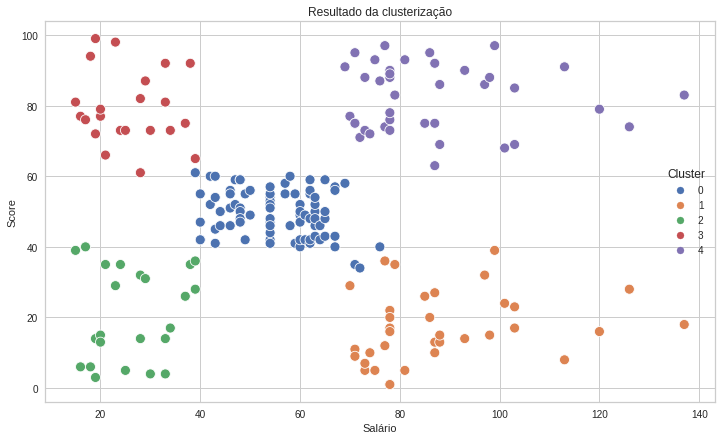

In [ ]:
# Plotando o resultado em um gráfico de dispersão
plt.figure(figsize = (12, 7))
sns.scatterplot(data=df_seg, x="Income_k$", y="Score", hue="Cluster", s=100, palette="deep")
plt.title("Resultado da clusterização")
plt.xlabel("Salário")
plt.ylabel("Score")
plt.show();

## 5. Apresentação da Solução e Deploy

### Testar modelo de clustering com novos valores

In [ ]:
# Testar o modelo de clustering com input de novos valores
X_new = np.array( [[39, 15]] )
new_y_pred = kmeans.predict( X_new )
print( "O conjunto indicado se enquadra no cluster {}".format( new_y_pred ) )

O conjunto indicado se enquadra no cluster [2]


### Exportação de Dados com Pickle

In [ ]:
# Instância do K-Means
pickle.dump(kmeans, open("kmeans.pickle", "wb"))

## 6. Referências

[1] Modelo STP: Descubra a melhor maneira de colocar suas estratégias de comunicação em prática. Camelo Digital, 2022. Disponível em: < https://camelo.digital/2021/03/01/modelo-stp/ >. Acesso em: 10, dezembro de 2022.